In [2]:
using Distributed
procs_to_use = 12
if nprocs() <= procs_to_use
    addprocs(procs_to_use-nprocs())
end
;

In [65]:
@everywhere using QuantumStates, OpticalBlochEquations, DifferentialEquations, UnitsToValue, StructArrays, StaticArrays, Parameters

@everywhere import Distributions: Normal, Geometric, Exponential
@everywhere using ProgressMeter, Plots
;

In [99]:
@everywhere include("helper_functions.jl")
include("define_molecular_structure.jl")
include("define_sim_params.jl")
include("define_prob.jl")
include("compute_size_temperature.jl")
;

In [100]:
using Logging: global_logger
using TerminalLoggers: TerminalLogger
global_logger(TerminalLogger())

prob_periodic.p.add_spontaneous_decay_kick = true
prob_func!(prob_periodic)
@time sol = DifferentialEquations.solve(prob_periodic, progress=true, progress_steps=100000, save_everystep=false, saveat=[])
;

ODE   0%|█                                              |  ETA: N/A
ODE  74%|███████████████████████████████████            |  ETA: 0:00:00
ODE  88%|██████████████████████████████████████████     |  ETA: 0:00:00
ODE  96%|██████████████████████████████████████████████ |  ETA: 0:00:00


  1.838978 seconds (6.11 M allocations: 870.694 MiB, 4.08% gc time, 44.64% compilation time: 100% of which was recompilation)


ODE 100%|███████████████████████████████████████████████| Time: 0:00:01


In [101]:
n_trajectories = 5
sols = distributed_solve(n_trajectories, prob_periodic, prob_func!, scan_nothing, [0])
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


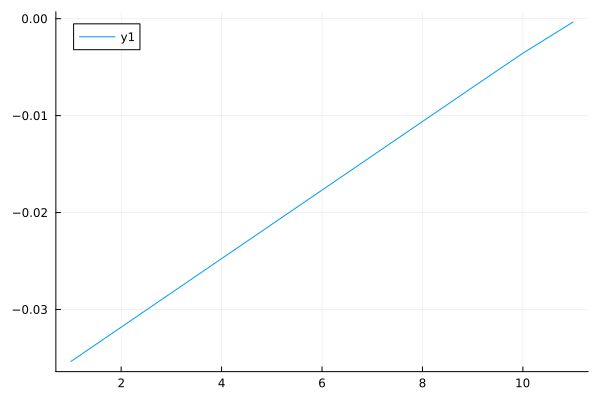

In [116]:
x.(sols[1][2].u) |> plot